### Importing Essential Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl
import warnings as wr
wr.filterwarnings('ignore')
import os

### Loading Dataset

In [2]:
df_1 = pd.read_csv('/Users/devanshpratap28/Documents/Python VS Code/VridhaMitra/ML/Dataset/train_keypoints.csv')
df_2 = pd.read_csv('/Users/devanshpratap28/Documents/Python VS Code/VridhaMitra/ML/Dataset/test_keypoints.csv')
df_3 = pd.read_csv('/Users/devanshpratap28/Documents/Python VS Code/VridhaMitra/ML/Dataset/valid_keypoints.csv')

In [3]:
df1 = pd.concat([df_1,df_2,df_3],axis=0)

In [4]:
df = df1[(df1['label'] == 'Baddha_Konasana') | (df1['label'] == 'Vajrasana') | (df1['label'] == 'Malasana') | (df1['label'] == 'Balasana')]

In [5]:
df['label'].value_counts()

label
Vajrasana          284
Balasana           231
Baddha_Konasana    225
Malasana           205
Name: count, dtype: int64

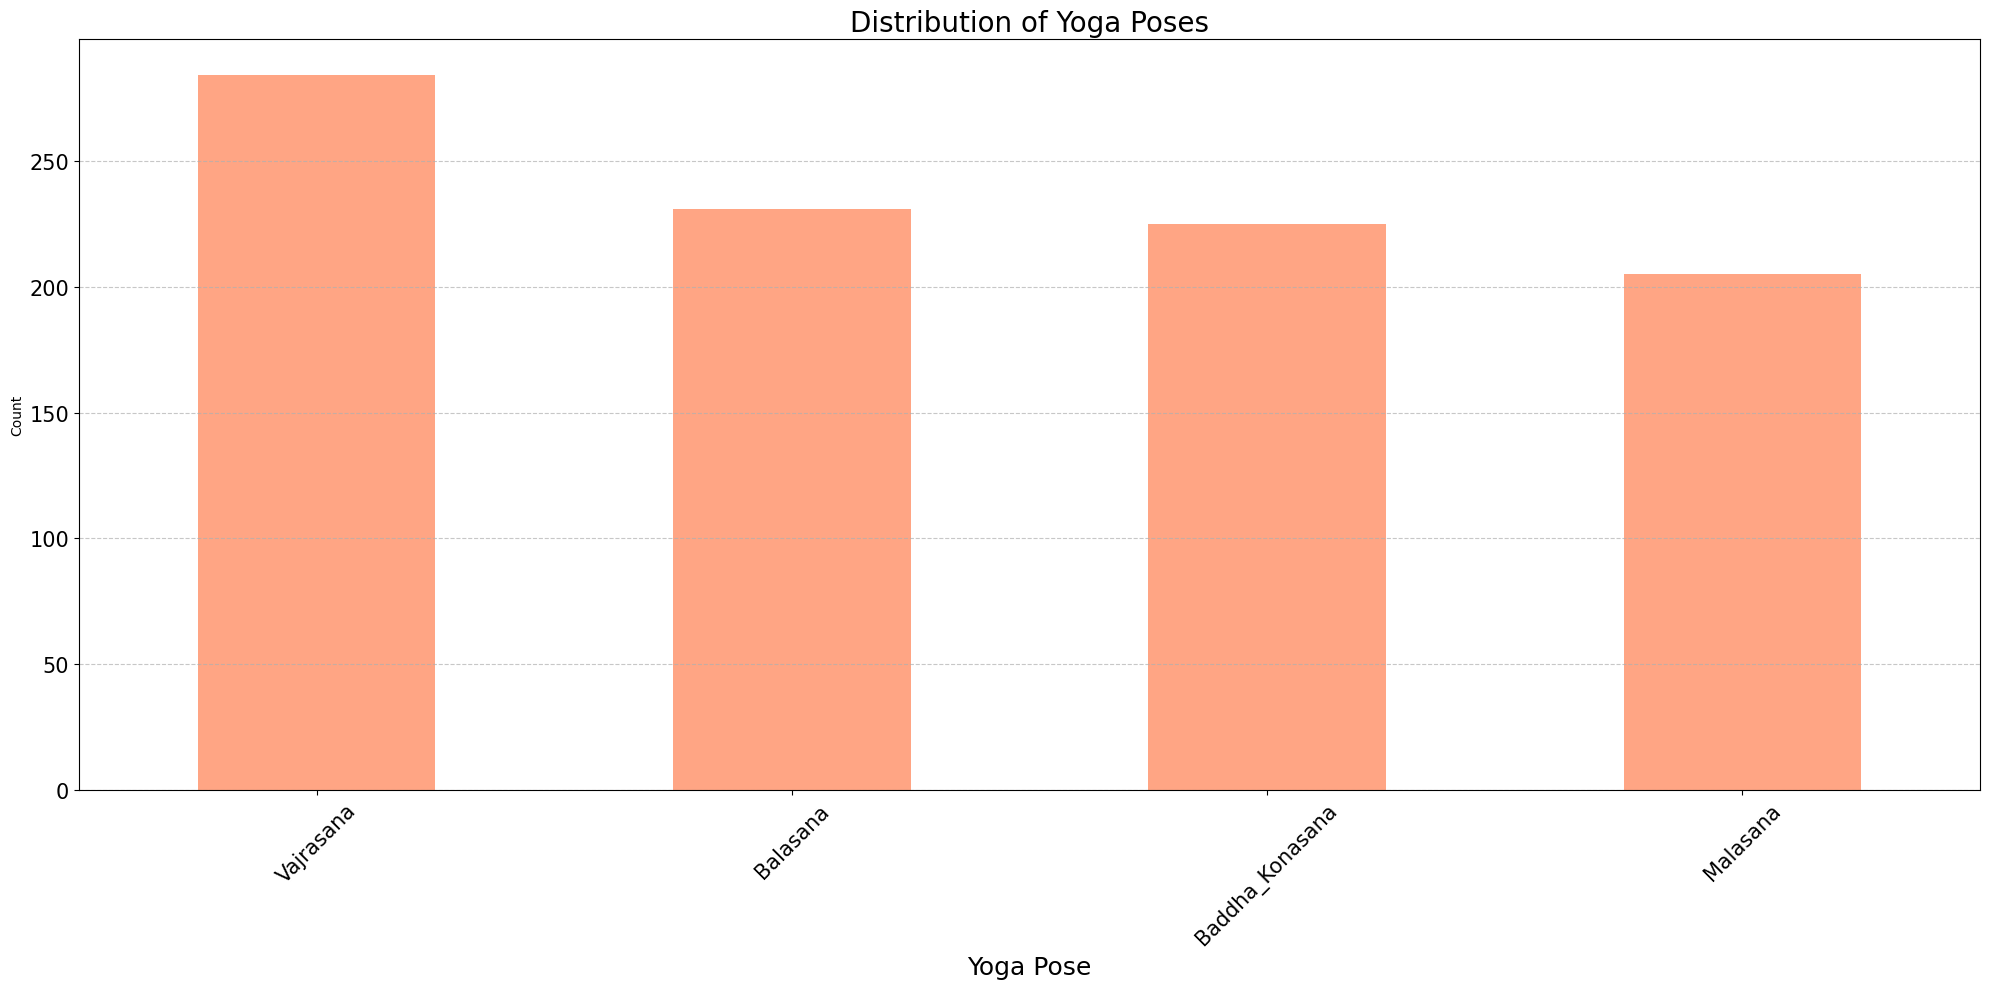

In [6]:
df['label'].value_counts().plot(kind='bar', figsize=(20, 10), color='coral', alpha=0.7)
plt.title('Distribution of Yoga Poses', fontsize=20)
plt.xlabel('Yoga Pose', fontsize=18)
plt.xlabel('Yoga Pose', fontsize=18)
plt.ylabel('Count')
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('/Users/devanshpratap28/Documents/Python VS Code/VridhaMitra/ML/Images/yoga_pose_distribution.png')
plt.show()

In [7]:
df.shape

(945, 67)

In [8]:
inputs = df.drop(columns=['label'],axis=1)
target = df['label']

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state=42)

### Label Encoding of Target Column

In [10]:
from sklearn.preprocessing import  LabelEncoder
label_enco = LabelEncoder()
y_train = label_enco.fit_transform(y_train)
y_test = label_enco.transform(y_test)

In [11]:
label_enco.classes_

array(['Baddha_Konasana', 'Balasana', 'Malasana', 'Vajrasana'],
      dtype=object)

### Scaling Integer Values between -1 to 1.

In [12]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

## Modelling

In [13]:
table = pd.DataFrame(columns=['Model', 'Precision', 'Recall','F1 Score','Accuracy'])

#### Function to display confusion matrix and display various measures

In [14]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,ConfusionMatrixDisplay
def evaluate(y_pred,model_name,table,y_test=y_test):
    accuracy = accuracy_score(y_test,y_pred)*100
    precision = precision_score(y_test,y_pred,average='micro')
    recall= recall_score(y_test,y_pred,average='micro')
    f1 = f1_score(y_test,y_pred,average='micro')
    new_row = pd.DataFrame({'Model': [model_name],
                            'Precision': [precision],
                            'Recall': [recall],
                            'F1 Score': [f1],
                            'Accuracy': [accuracy]})
    new_row = new_row.dropna(axis=1, how='all') # For removing warning.
    table = pd.concat([table, new_row], ignore_index=True)
    table = table.round(2)
    print(table)
    plt.figure(figsize=(9,10))
    ConfusionMatrixDisplay.from_predictions(label_enco.inverse_transform(y_test),label_enco.inverse_transform(y_pred),cmap='viridis')
    plt.savefig(f'/Users/devanshpratap28/Documents/Python VS Code/VridhaMitra/ML/Confusion_Matrix/Confusion_Matrix_{model_name}.png')
    plt.xticks(rotation=90)
    plt.show()
    return table



1. Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [16]:
y_pred = log_reg.predict(x_test)

                 Model  Precision  Recall  F1 Score  Accuracy
0  Logistic Regression        0.8     0.8       0.8     80.42


<Figure size 900x1000 with 0 Axes>

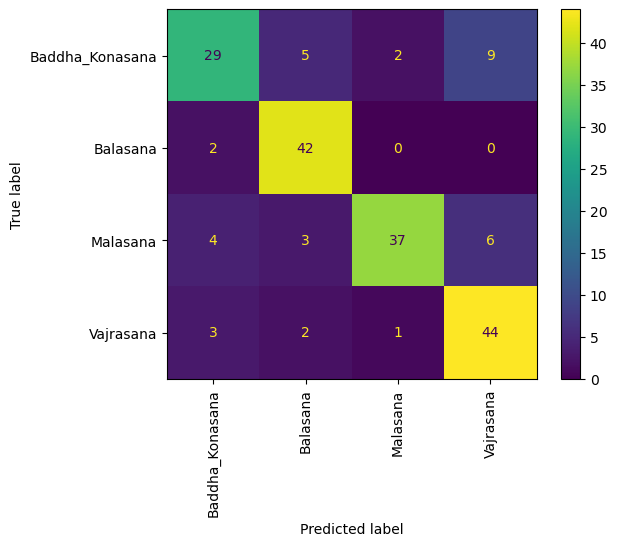

In [17]:
table = evaluate(y_pred,'Logistic Regression',table)

2. KNN

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [19]:
y_pred_knn = knn.predict(x_test)

                 Model  Precision  Recall  F1 Score  Accuracy
0  Logistic Regression       0.80    0.80      0.80     80.42
1   KNearest Neighbour       0.64    0.64      0.64     64.02


<Figure size 900x1000 with 0 Axes>

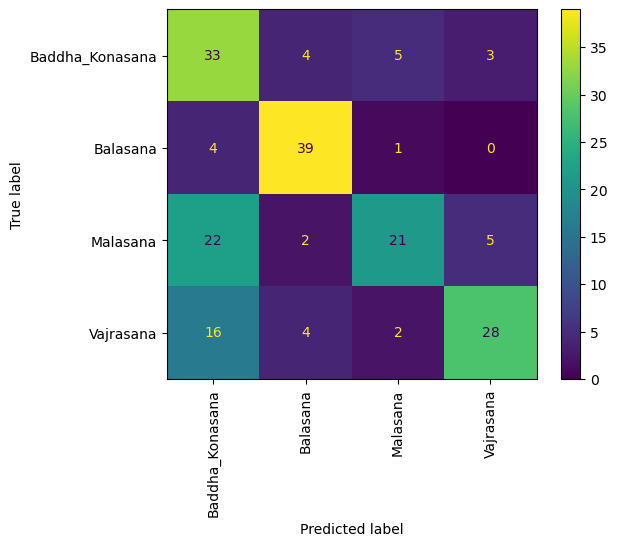

In [20]:
table = evaluate(y_pred_knn,'KNearest Neighbour',table)

3. SGD

In [21]:
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier()
sgd.fit(x_train,y_train)
y_pred_sgd=sgd.predict(x_test)

                 Model  Precision  Recall  F1 Score  Accuracy
0  Logistic Regression       0.80    0.80      0.80     80.42
1   KNearest Neighbour       0.64    0.64      0.64     64.02
2                  SGD       0.65    0.65      0.65     64.55


<Figure size 900x1000 with 0 Axes>

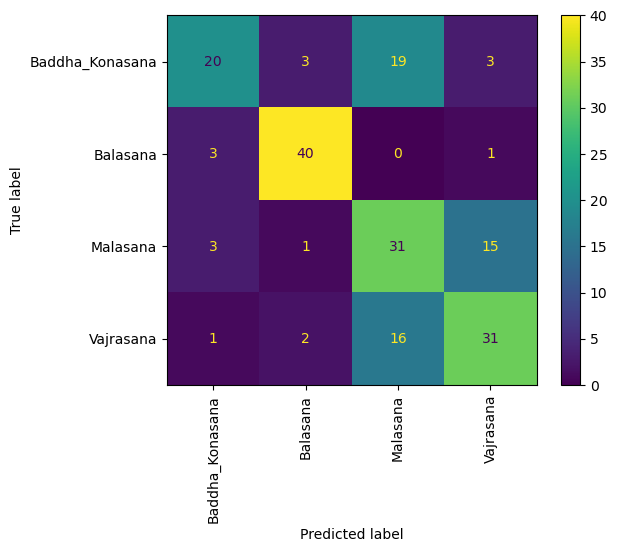

,Model,Precision,Recall,F1 Score,Accuracy
0,Logistic Regression,0.80,0.80,0.80,80.42
1,KNearest Neighbour,0.64,0.64,0.64,64.02
2,SGD,0.65,0.65,0.65,64.55


In [22]:
evaluate(y_pred_sgd,'SGD',table)

4. Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_dt=dt.predict(x_test)

                 Model  Precision  Recall  F1 Score  Accuracy
0  Logistic Regression       0.80    0.80      0.80     80.42
1   KNearest Neighbour       0.64    0.64      0.64     64.02
2        Decision Tree       0.54    0.54      0.54     54.50


<Figure size 900x1000 with 0 Axes>

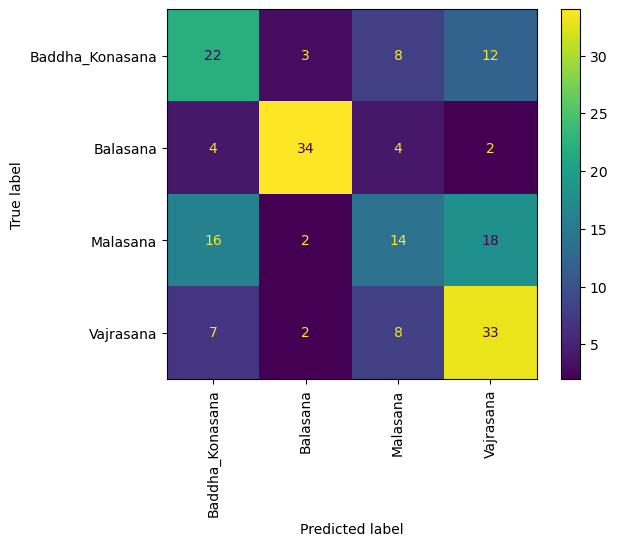

In [24]:
table = evaluate(y_pred_dt,'Decision Tree',table)

5. Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)

                 Model  Precision  Recall  F1 Score  Accuracy
0  Logistic Regression       0.80    0.80      0.80     80.42
1   KNearest Neighbour       0.64    0.64      0.64     64.02
2        Decision Tree       0.54    0.54      0.54     54.50
3        Random Forest       0.69    0.69      0.69     69.31


<Figure size 900x1000 with 0 Axes>

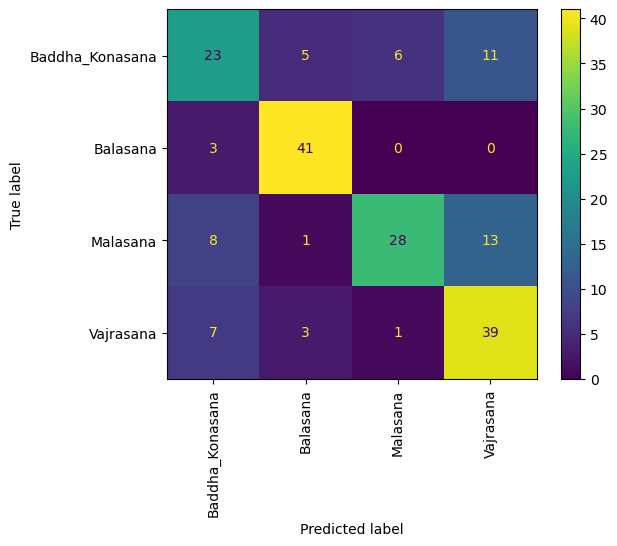

In [26]:
table = evaluate(y_pred_rf,"Random Forest",table)

In [27]:
table

,Model,Precision,Recall,F1 Score,Accuracy
0,Logistic Regression,0.80,0.80,0.80,80.42
1,KNearest Neighbour,0.64,0.64,0.64,64.02
2,Decision Tree,0.54,0.54,0.54,54.50
3,Random Forest,0.69,0.69,0.69,69.31


### Ensemble Learning

6. Gradient Boosting

In [28]:
from sklearn.ensemble import  GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred_gb=gb.predict(x_test)

                 Model  Precision  Recall  F1 Score  Accuracy
0  Logistic Regression       0.80    0.80      0.80     80.42
1   KNearest Neighbour       0.64    0.64      0.64     64.02
2        Decision Tree       0.54    0.54      0.54     54.50
3        Random Forest       0.69    0.69      0.69     69.31
4    Gradient Boosting       0.73    0.73      0.73     73.02


<Figure size 900x1000 with 0 Axes>

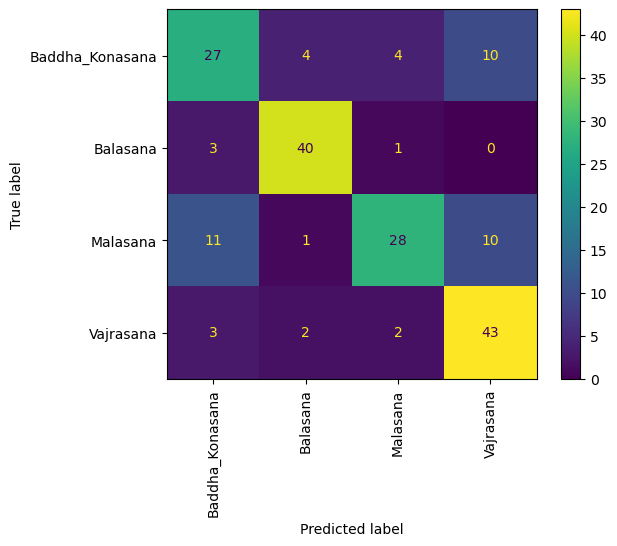

In [29]:

table = evaluate(y_pred_gb,"Gradient Boosting",table)

7. Voting Classifier

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                 Model  Precision  Recall  F1 Score  Accuracy
0  Logistic Regression       0.80    0.80      0.80     80.42
1   KNearest Neighbour       0.64    0.64      0.64     64.02
2        Decision Tree       0.54    0.54      0.54     54.50
3        Random Forest       0.69    0.69      0.69     69.31
4    Gradient Boosting       0.73    0.73      0.73     73.02
5    Voting Classifier       0.80    0.80      0.80     80.42


<Figure size 900x1000 with 0 Axes>

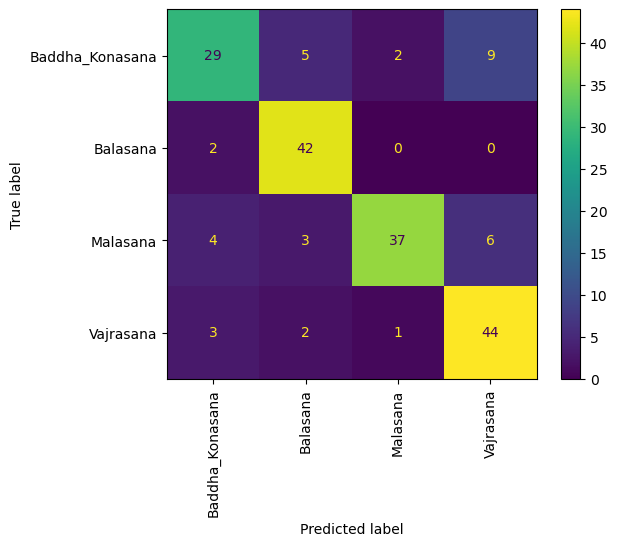

In [30]:
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression()),
        ('knn', KNeighborsClassifier()),
        ('rf', RandomForestClassifier()),
    ],
    voting='hard',
    weights=[3, 1, 1],
    n_jobs=-1
)
vc.fit(x_train, y_train)
y_pred_vc = vc.predict(x_test)
table = evaluate(y_pred_vc, "Voting Classifier", table)

### Saving Scalar,Label Encoder and best model [i.e Logistic Regression]

In [31]:
# Saving the model
with open('model.pkl', 'wb') as f:
    pkl.dump(log_reg, f)

with open('model.pkl', 'rb') as f:
    model = pkl.load(f)

# Saving the scaler
with open('scaler.pkl', 'wb') as f:
    pkl.dump(scalar, f)
with open('scaler.pkl', 'rb') as f:
    scaler = pkl.load(f)

# Saving the label encoder
with open('label_encoder.pkl', 'wb') as f:
    pkl.dump(label_enco, f)
with open('label_encoder.pkl', 'rb') as f:
    label_enco = pkl.load(f)